<a href="https://colab.research.google.com/github/kcw0331/Deeplearning/blob/main/2_1_a_first_look_at_a_neural_network(2020220071_%EA%B9%80%EC%B0%BD%EC%9A%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.keras.__version__    

'2.4.0'

- **tensorflow.keras.__version__**은 tencorflow의 버전을 확인해 주기 위해서 만들어진 코드 입니다.

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**<Listing 2.1 Loading the Mnist dataset in Keras>**
- **(train_images, train_labels), (test_images, test_labels)**은 return 값을 받아 
줍니다.
- **mnist.load_data()**는 3차원으로 되어있으며, 이 코드는 Mnist를 load하는 데이터 입니다.

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

퍼미션 에러가 나는 경우도 있는데, sudo 를 사용해서 노트북을 열거나, 에러가 나는 폴더(데이터 저장폴더)의 권한을 쓰기 가능하도록 변경해주어야 합니다. 

In [ ]:
train_images[:2,:,:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

- **train_images[:2 , : , :]**은 3개의 array가 되는 것을 볼 수 있습니다.


In [ ]:
train_images.shape

(60000, 28, 28)

- **train_images.shape**을 통해서 train data안에 60000개와 28x28픽셀이 있는 것을 shape을 통해 알 수 있습니다.

In [ ]:
len(train_labels)

60000

- **len(train_labels)**을 통해서 train_labels의 크기가 60000개라는 것을 알 수 있습니다.

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- **train_labels**을 해줘서 0~9까지의 숫자가 나오게되고 dtype이 integer를 가지고 8비트라는 것을 알 수 있습니다.

Let's have a look at the test data:

In [ ]:
test_images.shape  

(10000, 28, 28)

- **test_images.shape**을 통해서 test_images의 각 차원의 수를 알 수 있습니다.

In [ ]:
len(test_labels)

10000

- **len(test_labels)**를 사용해서 test_labels의 크기가 1000이라는 것을 알 수 있습니다.

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

- **test_labels**을 통해서 0~9까지의 숫자가 나오게 되며, dtype이 integer를 가지며 8비트라는 것을 알 수 있습니다.

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [ ]:
from tensorflow.keras import models        #여기서 모형을 define 해줍니다.
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  #28x28인데 Dense를 사용해서 output을 512차원으로 만들어 줍니다.
network.add(layers.Dense(10, activation='softmax'))   #그리고 여기에서 Dense를 사용해서 output이 10차원이 되게 해줍니다. softmax activation을 사용해서 내보내주게 됩니다.

**<List2.2 The network architecture>**
- input data 그림을 넣고, 그림을 넣으면 512차원의 output이 나오고 그 512차원의 output을 그 다음 Network에 넣으면 그 다음 Network에선 10차원의 data가 나오게 되는데, 이 10차원의 데이터가 나올 때, activation = 'softmx'를 써서 0~9까지 어떤게 나올지 구성을 하게 됩니다.


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [ ]:
network.compile(optimizer='rmsprop',   #optimizer는 rmsprop를 사용하였고
                loss='categorical_crossentropy',  #그리고 categorical_crossentropy loss를 사용하였으며
                metrics=['accuracy'])  #accuracy를 사용하였습니다.

**<Listing 2.3 The compilation step>**
- **optimizer** : 들어오는 데이터랑 Loss function에 기반해서 Network parameter를 업데이트 해주게 됩니다.
- **Loss funtion** : Network의 performance를 measure해 줍니다.
- **Metrics** : training이랑 testing할 때, 성능을 monitoring하는 measure입니다.


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [ ]:
import numpy as np
np.max(train_images)   #train_images가 0에서 255의 값이 있으며, 여기에서는 max를 해주어서 255가 나오게 됩니다.

255

- **np.max(train_images)** : train_images가 0에서 255의 값이 있으며, 여기에서는 max를 해주어서 255가 나오게 됩니다.

In [ ]:
train_images.shape    #train_images.shape을 해주게 되면, 60000개와 28x28이 생기게 됩니다.

(60000, 28, 28)

- **train_images.shape** : 각 차원의 수를 알 수 있으며, 현재 train_images에는 60000개와 28x28이 생기게 됩니다.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**<Listing 2.4 Preparing the image data>**
- train data와 test data를 255로 나누어서 0에서 1의 값이 되도록 만들어 줍니다. 
- 그리고 **astype**을 사용하여 integer를 float32로 해서 소수점이 나오는 형태로 32비트로 저장을 해줍니다.

In [ ]:
import numpy as np
np.max(train_images)   #바로 위의 코드에서 255로 나누었기 때문에, train_images의 max가 1의 값으로 바뀌게 됩니다.

1.0

- **np.max(train_images)** : 바로 위의 코드에서 255로 나누었기 때문에, train_images의 max가 1의 값으로 바뀌게 됩니다.

In [ ]:
train_images.shape   #그리고 여기에서도 train_images.reshape을 해주었기 때문에 28x28에서 784차원으로 바뀌게 됩니다.

(60000, 784)

- **train_images.shape** : 그리고 여기에서도 train_images.reshape을 해주었기 때문에 28x28에서 784차원으로 바뀌게 됩니다.

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [ ]:
train_labels   #train_labels를 하게 되면 0에서 9까지의 숫자가 됩니다.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- **train_labels** : train_labels를 하게 되면 0에서 9까지의 숫자가 됩니다.

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**<Listing 2.5 Preparing the labels>**
- 앞에서 test와 train을 0~9까지 정해줄 때, 그걸 **categorical encording**해주는 것입니다.

In [ ]:
train_labels  #위의 categorical을 실행해 주게 되면, 5가 0으로 바뀌고, 0은 1로 바뀌고, 4는 0으로 바뀌는 것을 알 수 있다. 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

- 위의 코드에서 **categorical**을 실행해 주게 되면서, train_labels하게 되면 5가 0으로 바뀌고, 0은 1로 바뀌고, 4는 0으로 바뀌는 것을 알 수 있습니다.

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4237 - accuracy: 0.8763
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9701
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0476 - accuracy: 0.9867
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0340 - accuracy: 0.9904


- **network.fit**을 사용해서 training이 5000개가 있다고 생각한다면 이 5000개를 한번에 쓰지 않고 128개씩 쓰면서 parametor들을 업데이트 시켜나가는 것입니다. 그리고 epochs를 사용해서 전체를 5번 돌려주겠다는 의미입니다.

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9797


- **evaluate**를 사용하여 tes_loss와 test_acc를 계산해줍니다.

In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9797000288963318


- **test_acc**를 사용하여 test의 accuracy의 결과를 print를 통해서 출력해 줍니다.
- print 결과 97%의 accuracy를 가지고 있는 것을 알 수 있습니다.


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

**<Tensor에 대한 예>**

In [ ]:
#0D tensors(Scalars)
import numpy as np 
x = np.array(12)
x

array(12)

In [ ]:
x.ndim  #ndim을 사용해서 차원의 수를 알 수 있습니다. 그래서 차원이 1차원이라는 것을 알 수 있습니다.

0

In [ ]:
#1D tensors(Vectors)
import numpy as np
x = np.array([12,3,6,14])
x

array([12,  3,  6, 14])

In [ ]:
x.ndim  #ndim을 사용해서 차원의 수를 알 수 있습니다. 그래서 차원이 1차원이라는 것을 알 수 있습니다.

1

In [ ]:
#2D tensors(Matrics)
import numpy as np
x = np.array([[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
x.ndim   #ndim을 사용해서 차원의 수를 알 수 있습니다. 그래서 차원이 2차원이라는 것을 알 수 있습니다.

2

In [ ]:
#3D tensors and higher-dimensional tensors
import numpy as np
x = np.array([[[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]],[[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]],[[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]]])
x.ndim  #ndim을 사용해서 차원의 수를 알 수 있습니다. 그래서 차원이 3차원이라는 것을 알 수 있습니다.

3

**<Key attributes for tensors 예>**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()   #mnist.load_data() <- 이 형식으로 해서 데이터를 읽어 줍니다.

In [ ]:
print(train_images.ndim)   #ndim을 사용해서 차원의 수를 확인해 줍니다.

3


In [ ]:
print(train_images.shape)  #shape을 사용해서 각 차원 별로 몇개씩 있는지 알 수 있습니다.

(60000, 28, 28)


In [ ]:
print(train_images.dtype)  #dtype을 사용해서 integer라는 것을 알 수 있습니다.

uint8


**< Displaying Digits >**


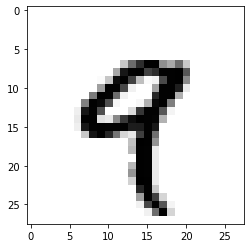

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)   #matplotlib을 간단하게 plt로 바꾸어주고 plt.show를 사용하여 이미지를 출력해 줍니다.
plt.show()

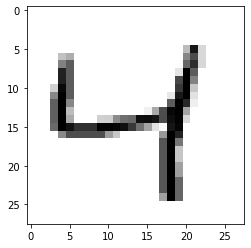

In [ ]:
my_slice = train_images[2,:,:]    #이 3번째 거를 그냥 출력했을 때의 결과 입니다.
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

**< Tensor slicing >**

In [ ]:
my_slice = train_images[10:100]   #처음 10번째 부터 100번째 꺼 까지를 잘라줍니다.
print(my_slice.shape)     

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100,:,:]   #뒤의 차원을 비워두고 차원을 다 써주는 경우입니다.
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100,0:28,0:28]  #28과 28을 모두 다 써주기 때문에 3가지 모두 같은 값이 나오는 것을 알 수 있습니다.
my_slice.shape

(90, 28, 28)

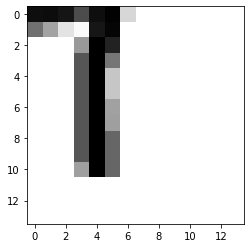

In [ ]:
my_slice = train_images[2,14:,14:]  #3번째 거를 14, 14로 잘라서 출력했을 때 입니다.
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

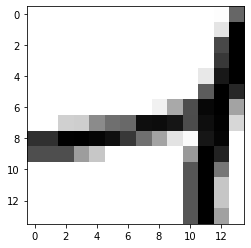

In [ ]:
my_slice = train_images[2,7:-7,7:-7]  #7하고 -7을 해줘서 가운데만 자르는 결과를 얻을 수 있습니다.
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

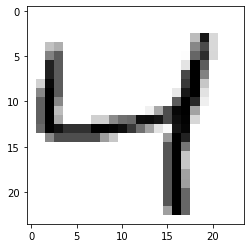

In [ ]:
my_slice = train_images[2,2:-2,2:-2]  #2하고 -2을 해줘서 앞부분만 살짝씩 잘라주는 결과를 얻을 수 있습니다.
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

**< Batches >**

In [ ]:
#1th batch
batch = train_images[:128]  #처음부터 128까지 잘라낼 수 있습니다.

In [ ]:
#2th batch
batch = train_images[128:256]  #128부터 256까지 잘라낼 수 있습니다.

**<relu and addition에 대한 예제>**

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2, 'x.ndim() must 2' #x.ndim() must 2 이렇게 되지 않으면 에러구문이 나오게 하는것을 넣어준 것 입니다.

  x == x.copy()   #이걸 안해주게 되면 원본의 x값이 변하기 때문에 x = x.copy()를 해줘서 원본 x의 값이 바뀌지 않게 해주는 것입니다.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i,j],0)   #for구문을 돌려주고 여기에서는 0보다 작은 값들은 0을로 바꾸어 주는 역할을 해주고 있습니다.

  return x

In [ ]:
x   

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

**<Broadcasting에 대한 예제>**


In [ ]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([[1,1,1,1,1],[1,1,1,1,1]])

In [ ]:
x.shape   #shape을 사용하여 x의 차원을 확인해 줍니다. 그래서 x는 5차원이라는 것을 알 수 있습니다.

(5,)

In [ ]:
y.shape  #shape을 사용하여 y의 차원을 확인해 줍니다. 그래서 y는 2콤마 5라는 것을 알 수 있습니다.

(2, 5)

In [ ]:
x + y  #Broadcasting이 어떻게되는지 확인을 해줍니다. 그러면 x의 차원이 부족하기 때문에 x에서 Broadcasting을 해줘서 y의 차원과 같아지게 만들고 나서 x 와 y를 더해줍니다.

array([[2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6]])

**<Tensor reshaping에 대한 예제>** 

In [ ]:
import numpy as np

In [ ]:
x = np.array([[0.,1.],[2.,3.],[4.,5.]])

In [ ]:
x    #그럼 x는 이렇게 정의가 됩니다.

array([[0., 1.],
       [2., 3.],
       [4., 5.]])

In [ ]:
x.shape  #그럼 x는 3콤마 2를 가지는 shape이라는 메트릭스가 됩니다.

(3, 2)

In [ ]:
x.reshape((6,1))   #resahpe을 하게 되면 0,1,2,3,4,5로 재배치가 됩니다.

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x.reshape((2,3))  #reshape을 하게 되면, (0.,1.,2.) (3.,4.,5.)으로 됩니다.  

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = x.reshape((6,1))  #reshape((6,1))을 하게 되면 6,1 매트릭트가 나오는 것을 알 수 있습니다.

In [ ]:
x  

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2,3))

In [ ]:
x    #reshape((2,3))을 하게 되면 2,3차원이 나오는 것을 알 수 있습니다.

array([[0., 1., 2.],
       [3., 4., 5.]])

**Reshape에 대한 예(Geometric interpretation of tensor operations)**


In [ ]:
import numpy as np
x = np.array([[[1,2,3,4,5],[1,1,1,1,1]],[[1,1,1,1,1],[1,2,3,4,5]]])
x.shape  #shape은 각 차원의 수를 알 수 있습니다.

(2, 2, 5)

In [ ]:
x.reshape(2,10)  #reshape(2,10)을 하게 되면 차원이 (2,10)이 되는 것을 알 수 있습니다.

array([[1, 2, 3, 4, 5, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 2, 3, 4, 5]])

In [ ]:
x.reshape(4,5)   #reshape(4,5)을 하게 되면 차원이 (4,5)이 되는 것을 알 수 있습니다.

array([[1, 2, 3, 4, 5],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 2, 3, 4, 5]])